<a id="6"></a>
<center><h1><u>Developing Simple Chatbot using Python and Deep Learning</h1></u></center>

In [25]:
# import above mentioned libraries
import random
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
import numpy as np
import pickle
import json

Now we will import **nltk** library for preprocess the data.<br>
First we will import **nltk** library.<br>
After importing **nltk**, we will **WordNetLemmatizer** and create object of it and download the neccessay package such as **punkt** and **wordnet**.

In [26]:
#import nltk 
import nltk
#importing WordNetLemmatizer from nltk.stem
from nltk.stem import WordNetLemmatizer
#creating WordNetLemmatizer object 
lemmatizer= WordNetLemmatizer()
#download punkt and wordnet 
nltk.download()
nltk.download('punkt')
nltk.download('wordnet')


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now create a folder in drive and add path here to make use of files and intents.

In [28]:
%cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [29]:
!ls

chatbot_model.h5  classes.pkl  static  template  words.pkl


In [30]:

words=[]
classes=[]
documents=[]

ignore_words =['?','!']

data_file=open('/content/drive/MyDrive/NLP/template/intents.json').read()

intents=json.loads(data_file)

In [31]:

for intent in intents["intents"]:
    for pattern in intent["patterns"]:
      w=nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w,intent['tag']))
      if intent["tag"] not in classes:
        classes.append(intent['tag'])

In [32]:

words=[lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words= sorted(list(set(words)))

classes=sorted(list(set(classes)))

In [33]:
print(len(documents),'documents')
print(len(classes),'classes',classes)
print(len(words),'unique lemmatized words',words)

100 documents
55 classes ['AI', 'abbr', 'artificial', 'bend', 'body', 'bot1', 'breathe', 'business', 'chatbot', 'chatterbox', 'clone', 'comp', 'computer', 'control', 'cramped', 'date', 'death', 'do', 'events', 'fav', 'fight', 'goodbye', 'greetings', 'hardware', 'hobby', 'idea', 'imortal', 'lang', 'laugh', 'lie', 'machine', 'malfunction', 'motormouth', 'move', 'name', 'name1', 'need', 'noanswer', 'os', 'program', 'programming', 'ratchet', 'robotics', 'robots', 'robotss', 'sapient', 'sense', 'sentiment', 'shoe', 'sound', 'stupid', 'thanks', 'usage', 'who', 'wt']
126 unique lemmatized words ["'m", "'s", ',', 'a', 'ai', 'all', 'allowed', 'am', 'an', 'are', 'artificial', 'awesome', 'be', 'being', 'bend', 'body', 'bot', 'breathe', 'business', 'bye', 'can', 'chat', 'chatterbox', 'clone', 'coffee', 'computer', 'control', 'cramped', 'data', 'date', 'die', 'do', 'entity', 'event', 'favorite', 'favour', 'fight', 'for', 'good', 'great', 'hardware', 'haroo', 'hello', 'help', 'helpful', 'helping', '

In [34]:
pickle.dump(words, open('words.pkl','wb'))

pickle.dump(classes, open('classes.pkl','wb'))

In [35]:
training=[]

output_empty = [0] * len(classes)

for doc in documents:

    bag=[]
    pattern_words=doc[0]
    pattern_words=[lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row=list(output_empty)

    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [36]:
random.shuffle(training)
training=np.array(training)
train_x=list(training[:,0])
train_y=list(training[:,1])
print("Training data created")

Training data created


<ipython-input-36-61bde1b4ce4c>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training=np.array(training)


In [37]:
model=Sequential()
model.add(Dense(128,input_shape=(len(train_x[0]),),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]),activation='softmax'))

After adding all the hidden layers, now we check the summary of our model.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               16256     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 55)                3575      
                                                                 
Total params: 28,087
Trainable params: 28,087
Non-trainable params: 0
_________________________________________________________________


In [38]:
sgd= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [39]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print("model created")

Epoch 1/150
20/20 [==============================] - 0s 2ms/step - loss: 4.0283 - accuracy: 0.0300
Epoch 2/150
20/20 [==============================] - 0s 2ms/step - loss: 3.9392 - accuracy: 0.0700
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: 3.8625 - accuracy: 0.1100
Epoch 4/150
20/20 [==============================] - 0s 2ms/step - loss: 3.7853 - accuracy: 0.1600
Epoch 5/150
20/20 [==============================] - 0s 2ms/step - loss: 3.7453 - accuracy: 0.1100
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 3.5892 - accuracy: 0.1800
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 3.5554 - accuracy: 0.1000
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 3.3996 - accuracy: 0.1900
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 3.2770 - accuracy: 0.2300
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 3.3132 - accuracy: 0.1900
Epoch 11/

Now our model is trained, So we have to deploy our model with an interface.
So for flask implementation we need IDLEs for implementation. But in this project we are going to implement flask with the help of Google Colab Notebook.

So lets start with Deployment
---

First we will install flask_ngrok for flask implementation in google colab.

In [17]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now we will install and download the ngrok with these commands for installing.

In [19]:
! ngrok config add-authtoken 2Ku4oUNr7ddMQcJwtkuuuuQsLnN_5D67zkK8UusL2rnW1ntrY

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [40]:
from flask import *
from flask_ngrok import run_with_ngrok
import random
import numpy as np
import pickle
import json
from tensorflow.keras.models import load_model
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [21]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15982 sha256=6c432d46fd4d8b1c94e961544958103898af7068f857b903f858310c08e0fd1d
  Stored in directory: /root/.cache/pip/wheels/5e/0a/51/8cb053ccd84481dd3233eba4cdb608bc7a885fd8ca418c0806
Successfully built pyngrok


In [41]:
#create a flask app
app= Flask(__name__)
run_with_ngrok(app)

model= load_model('/content/drive/MyDrive/NLP/chatbot_model.h5')

intents= json.loads(open('/content/drive/MyDrive/NLP/template/intents.json').read())

words= pickle.load(open('/content/drive/MyDrive/NLP/words.pkl','rb'))

classes= pickle.load(open('/content/drive/MyDrive/NLP/classes.pkl','rb'))

@app.route("/")

def home():
    return render_template('/content/drive/MyDrive/NLP/template/index.html')

@app.route("/get",methods=["POST"])

def chatbot_response():
    msg = request.form["msg"]

    if msg.startswith('my name is'):
        name =msg[11:]
        ints = predict_class(msg, model)
        res1 = getResponse(ints, intents)
        res =res1.replace("{n}",name)

    elif msg.startswith('Hi my name is'):
        name =msg[14:]
        
        ints = predict_class(msg, model)

        res1 = getResponse(ints, intents)

        res =res1.replace("{n}",name)

    else:
        
        ints = predict_class(msg, model)

        res1 = getResponse(ints, intents)

    return res

def clean_up_sentence(sentence):
    
    sentence_words= nltk.word_tokenize(sentence)
    
    sentence_words=[lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    
    return sentence_words

def bow(sentence, words, show_details=True):
    
    sentence_words=clean_up_sentence(sentence)
    
    bag=[0]*len(words)
    
    for s in sentence_words:
        
        for i, w in enumerate(words):
          
          if w==s:
                
                bag[i]=1
                
                if show_details:
                    
                    print('found in bag: %s' % w)
    
    return np.array(bag)


def predict_class(sentence, model):
   
    p=bow(sentence, words, show_details=False)
    
    res= model.predict(np.array([p]))[0]
    
    ERROR_THRESHOLD=0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x:x[1],reverse=True)
    
    return_list=[]
    
    for r in results:
        
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    
    return return_list

def getResponse(ints, intents_json):
    tag=ints[0]['intent']

    list_of_intents = intents_json["intents"]
    
    for i in list_of_intents:
        
        if i['tag']==tag:
            result=random.choice(i['responses'])
            break
    
    return result

if __name__ == "__main__":
 
    app.run()
    app.debug=True


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f42f-34-75-180-217.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.8/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.8/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-41-b850de9b556f>", line 16, in home
    return render_template('/content/drive/MyDrive/NLP/template/index.html')
  F

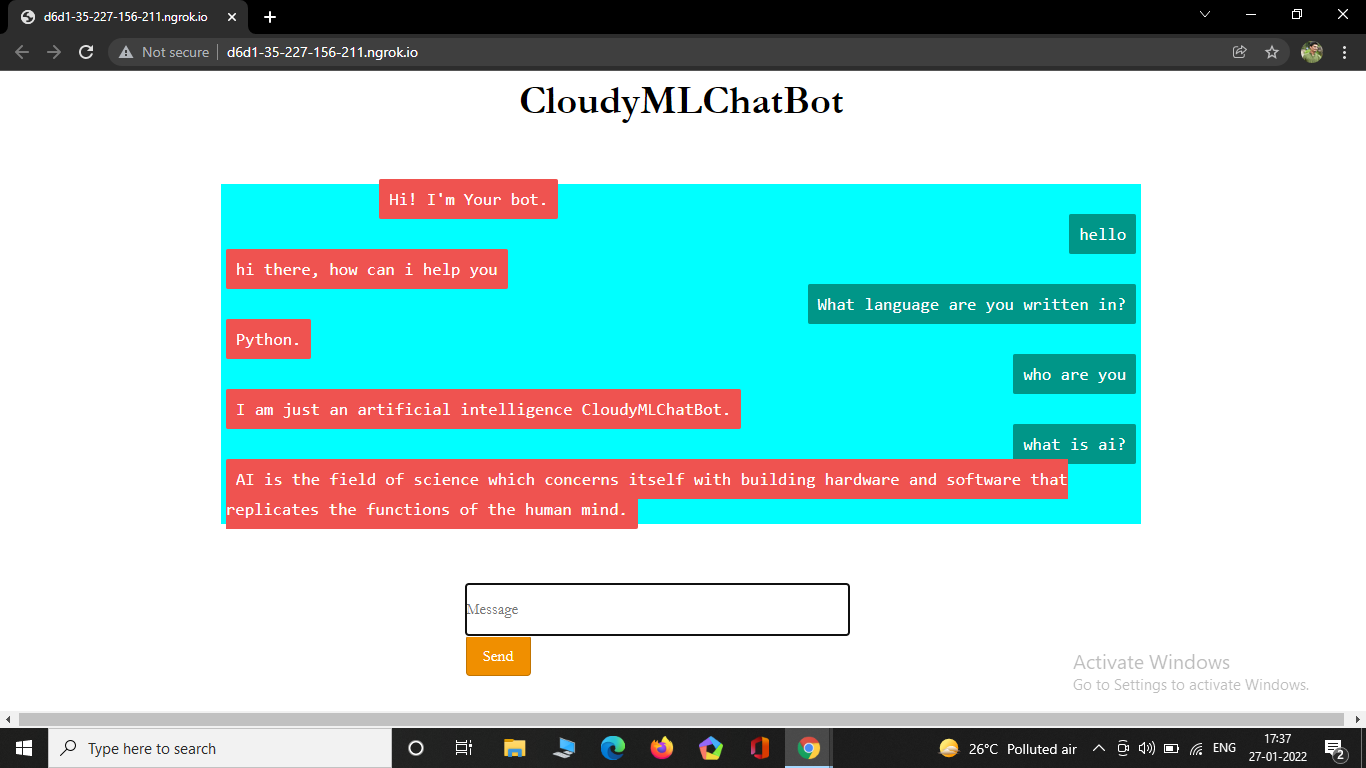

Here is an output of chatbot. you play with chatbot by changing the intents.json and develop as many chatbots as you can :)
---

We have come to an end of this project but don't stop here, try as many projects of the similar type to get a better understanding of the use cases. 
Solve the practice sheet of this project to test yourself.!!


![](https://i.gifer.com/9ipP.gif)

Great job!! You have come to the end of this assignment. Treat yourself for this :))
<br>
# Do fill this [feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next assignment/projects.